# TrainSet와 TestSet의 필요성
- 앞장의 방법과 같이 문제와 답을 모두 알려주고 해당 범위내에서 점수를 내면 항상 100점이 나온다.
- 하나의 DataSet를 Train부분과 Test부분으로 분리하여
- Train Set으로 학습하고 학습내용을 Test Set으로 검증을 하여야 모델의 정확한 정확성을 신뢰할 수 있다.
- *** Train Set을 만드는이유 신뢰성!

In [32]:
# Data불러오기
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Train Set와 Test Set으로 분리하기

In [33]:
# Train Set
train_input = fruits.loc[:34,['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [34]:
train_target = fruits.loc[0:34, 'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [35]:
# Train Set의 갯수 확인하기
len(train_input) == len(train_target)

True

In [36]:
# Test set
test_input = fruits.loc[35:,['length','weight']]
test_input.head()

,length,weight
35,9.8,6.7
36,10.5,7.5
37,10.6,7.0
38,11.0,9.7
39,11.2,9.8


In [37]:
test_target = fruits.loc[35:,'name']
test_target.head()

35    berry
36    berry
37    berry
38    berry
39    berry
Name: name, dtype: object

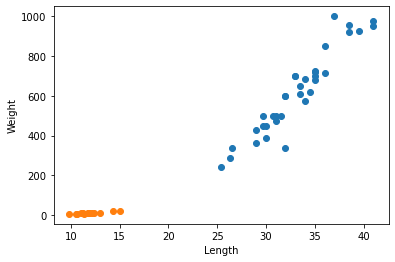

In [38]:
plt.scatter(train_input['length'], train_input['weight'])
plt.scatter(test_input['length'], test_input['weight'])


plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# KNN을 이용한 분류

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
kn = KNeighborsClassifier()

In [41]:
# 학습시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [42]:
# Test Data로 정확성 확인하기
kn.score(test_input, test_target)

0.0

### > 샘플링(sampling) 편향이 발생함

> Train 과  Test 구분시에 문제가 발생하였다.  
> Train 에서는 berry의 자료는 한번도 학습한적 없고 오직 apple의 자료만 학습을 하였다.

### Numpy를 이용하여 샘플링 편향을 제거하기

In [43]:
import numpy as np

In [44]:
np.random.seed(42) # 교육을위해 random sample을 하나로 정의하여 다른 모델에서 동일한 값으로 테스트 가능
index = np.arange(49)
np.random.shuffle(index)
print(index)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [45]:
# Train으로 사용될 index번호 출력하기
index[0:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [46]:
# Train Data 구성하기
train_input = fruits.loc[list(index[0:35]), ['length', 'weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [47]:
train_target = fruits.loc[list(index[0:35]), 'name']
train_target.head()

13    apple
45    berry
47    berry
44    berry
17    apple
Name: name, dtype: object

In [48]:
# 갯수 확인
len(train_input) == len(train_target)

True

In [49]:
# Test로 사용될 index번호 출력하기
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [50]:
# Test Data 구성하기
test_input = fruits.loc[list(index[35:]), ['length', 'weight']]
test_input.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [51]:
test_target = fruits.loc[list(index[35:]), 'name']
test_target.head()

37    berry
35    berry
23    apple
39    berry
10    apple
Name: name, dtype: object

In [52]:
# 길이 확인
len(test_input) == len(test_target)

True

### Data의 분포를 산포도로 확인하기
- 잘 섞여있나 확인하기!
- seaborn은 발표할때 사용을 많이함

In [53]:
import matplotlib.pyplot as plt

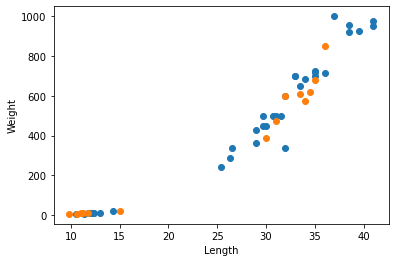

In [54]:
plt.scatter(train_input['length'], train_input['weight'])
plt.scatter(test_input['length'], test_input['weight'])


plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# KNN을 이용한 분류

In [55]:
kn = KNeighborsClassifier()

In [56]:
# 학습시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [57]:
# Test Data로 정확성 확인하기
kn.score(test_input, test_target)

1.0

---
## sciketLearn으로 Train Set와 Teat Set 나누기

In [58]:
# train test 나누기
from sklearn.model_selection import train_test_split

In [59]:
# Feature와 Target분리하기
fruits_data = fruits[['length','weight']]
fruits_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [60]:
fruits_target = fruits['name']
fruits_target.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

In [61]:
train_input, test_input, train_target, test_target = train_test_split(fruits_data, fruits_target, random_state=42)

In [62]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [63]:
# 빈도수 세주는 모듈
import collections 

In [64]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 10, 'berry': 3})


In [66]:
# apple의 갯수
len(fruits[fruits['name']=='apple'])

35

In [67]:
# berry 갯수
len(fruits[fruits['name']=='berry'])

14

In [68]:
# apple과 berry의 갯수 비율
len(fruits[fruits['name']=='apple']) / len(fruits[fruits['name']=='berry'])

2.5

In [69]:
10 / 3

3.3333333333333335

> 비율이 서로 안맞아 그럼 결과값이 이상해 짐!

In [70]:
# 분류(Classification)시 데이터가 동일한 비율로 섞이게 하자!
# Classification 일때는 {stratify='타겟기준!'}옵션 꼭 적기!
train_input, test_input, train_target, test_target = train_test_split(
    fruits_data, 
    fruits_target, 
    # 섞이게 할때 비율을 비슷하게 맞춰라! 라고 하는 옵션!!! 중요~!
    stratify=fruits_target, 
    random_state=42
    )

In [71]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 9, 'berry': 4})


In [72]:
9 / 4

2.25

In [73]:
# 학습시키기
kn.fit(train_input, train_target)

# Test Data로 정확성 확인하기
kn.score(test_input, test_target)

1.0